### $\color{royalblue}{\text{ Prva vježba iz numeričkih metoda u astronomiji (NMA), datum: 14.10.2024.}} $

### Uvozimo potrebne biblioteke.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import time

### $\color{magenta}{\text{0. ZAGRIJAVANJE.}} $

### Napisati funkciju koja vraća sumu prvih $n$ članova aritmetičkog niza.
### Znamo da je prvi član $a_1$, razlika između susjednih članova $d$, i $n$ broj članova.

In [6]:
def suma_aritmetickog_niza(a1, d, n):
    Sn = (n / 2) * (2 * a1 + (n - 1) * d)
    return Sn

a1 = 5
d = 1
n = 20

print(f'Suma prvih {n} članova aritmetičkog niza je:', suma_aritmetickog_niza(a1, d, n))

Suma prvih 20 članova aritmetičkog niza je: 290.0


### $\color{magenta}{\text{1. GRAFIČKA METODA.}} $

### Najjednostavnija metoda za nalaženje nule funkcije. Rješenje tražimo "odokativno".
### Pogledamo grafik funkcije ispod, te zaključujemo da su nule funkcije $x\approx1.5$ i $x\approx4.5$.

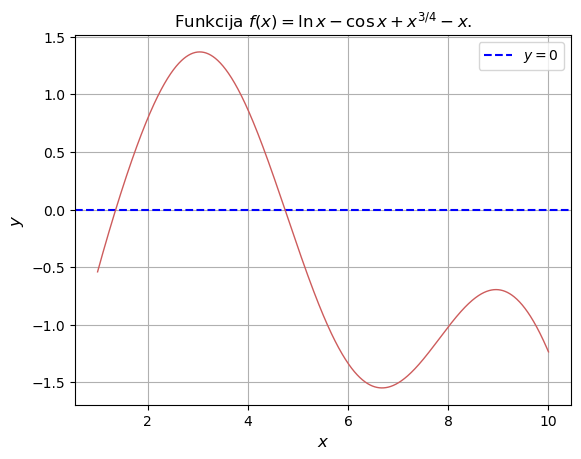

In [7]:
x = np.linspace(1, 10, 1000)
f = np.log(x) - np.cos(x) + x**(3/4) - x

plt.axhline(y=0, color='blue', linestyle='--', label='$y=0$') # horizontalna linija

plt.plot(x, f, color='indianred', linewidth=1)
plt.title(r'Funkcija $f(x)=\ln{x}-\cos{x}+x^{3/4}-x$.')
plt.xlabel(r'$x$', fontsize=12, fontweight='bold')
plt.ylabel(r'$y$', fontsize=12, fontweight='bold')
plt.legend()
plt.grid()
plt.show()

### $\color{magenta}{\text{2. METODA TETIVA.}} $

### Figuriše nam jednačina $P(x)=0$. Tražimo vrijednosti (a, b) za koje će biti 
### zadovoljen uslov $P(a)\cdot P(b)<0$. Jedinstvenost rješenja je garantovana
### ako je funkcija monotona na intervalu $[a,\,b]$, tj. ako je $P'(x)>0$ ili $P'(x)<0$ svuda.
### Drugim riječima, uslovi za ovu metodu su: tražimo interval $(a,b)$ na kome je funkcija neprekidna,
### monotona i treba da važi: $f(a)\cdot f(b)<0$. Poželjno je da interval $(a,b)$ bude, što je moguće manji.

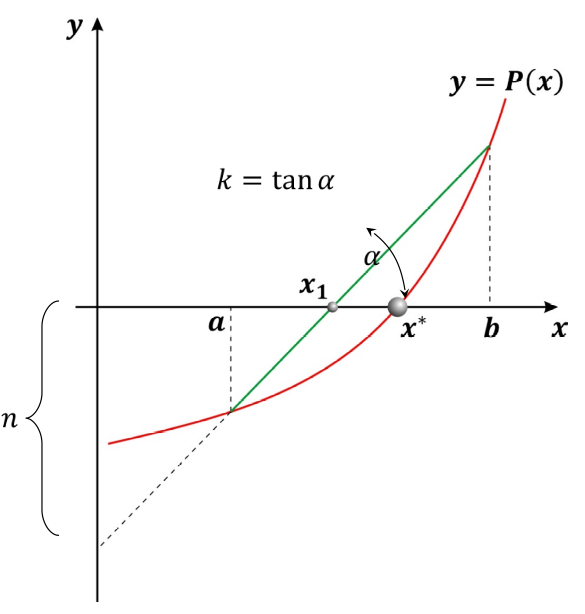

### Na slici iznad, jednačina prave ima oblik $y=kx+n$, a važe i  jednakosti $P(a)=P_a=ka+n$;
### $P(b)=P_b=kb+n$. Kombinacijom, dobijamo jednačinu $x_1=a-\frac{P_a(b-a)}{P_b-P_a}$.
### Ako je $P(x_1)<0$, onda se analizira interval $[x_1,b]$, a ako je $P(x_1)>0$, onda se
### analizira interval $[a,x_1]$. Vrijednosti $a$ i $b$ se ažuriraju na osnovu gorepomenutih uslova.

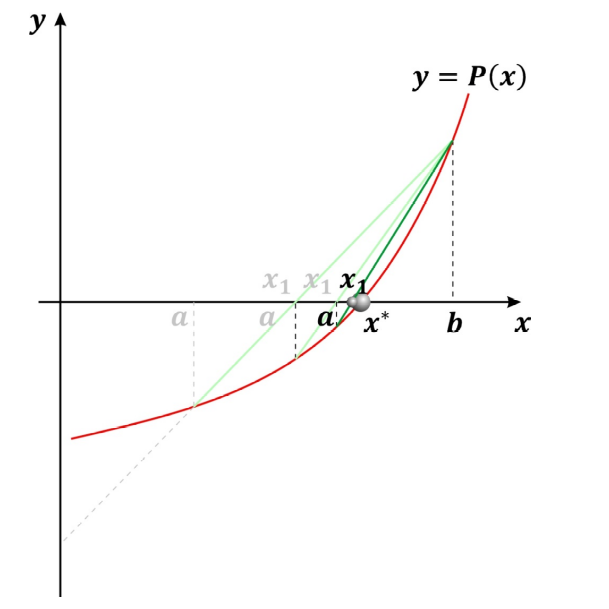

### Posmatramo funkciju $f(x)=\ln{x}-\cos{x}+x^{3/4}-x$, za koju želimo naći nule
### funkcije pomoću metode tetiva (sl. regula falsi). Definišemo početne vrijednosti i parametre
### za petlju. Tačnost određuje uslov kada se iteracija zaustavlja, tj.  kad je apsolutna razlika
### $\delta$ manja od definisane tačnosti.

vrijeme izračunavanja: 0.00749 s
broj iteracija: 6
rješenje jednacine: 4.740672


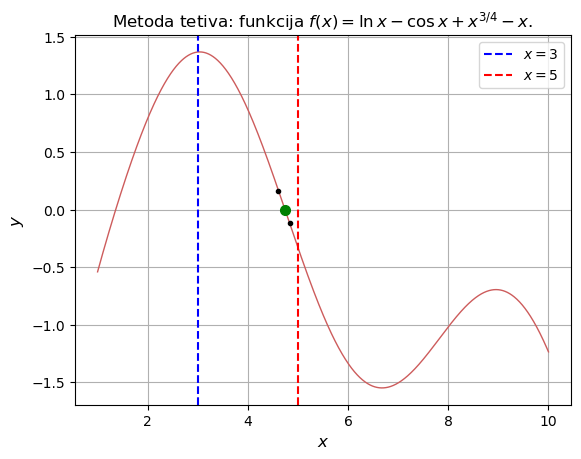

In [8]:
# x = np.arange(1, 3, step = 1e-3)

x = np.linspace(1, 10, 1000)
f = np.log(x) - np.cos(x) + x**(3/4) - x

plt.plot(x, f, color='indianred', linewidth=1)
plt.title(r'Metoda tetiva: funkcija $f(x)=\ln{x}-\cos{x}+x^{3/4}-x$.')
plt.xlabel(r'$x$', fontsize=12, fontweight='bold')
plt.ylabel(r'$y$', fontsize=12, fontweight='bold')
plt.grid()


# Dodavanje vertikalnih linija na x=3 i x=5
plt.axvline(x=3, color='blue', linestyle='--', label='$x=3$')
plt.axvline(x=5, color='red', linestyle='--', label='$x=5$')

a = 3
b = 5
tacnost = 1e-8
delta = 2 * tacnost
broj_iteracija = 0
pocetak = time.time()

while abs(delta) > tacnost:
    
    broj_iteracija += 1
    Pa = np.log(a) - np.cos(a) + a**(3/4) - a
    Pb = np.log(b) - np.cos(b) + b**(3/4) - b
    
    # plt.plot([a, b], [Pa, Pb], color='black') # tetive
    
    x1 = a - Pa * (b - a) / (Pb - Pa)  
    Px1 = np.log(x1) - np.cos(x1) + x1**(3/4) - x1
    
    if Px1 < 0:
        delta = np.abs(x1 - a)
        a = x1
    else:
        delta = np.abs(x1 - b)
        b = x1
        
    plt.plot(x1, Px1, 'o', color='black', markersize=3)

vrijeme_tetive = time.time() - pocetak
iteracije_tetive = broj_iteracija 

print('vrijeme izračunavanja:', np.round((vrijeme_tetive), 5), 's')
print('broj iteracija: {}'.format(iteracije_tetive))
print('rješenje jednacine:', np.round((x1), 6))

plt.plot(x1, Px1, 'o', color='green', markersize=7)
plt.legend()
plt.show()

### $\color{magenta}{\text{3. NjUTNOVA METODA.}} $

### Figuriše nam jednačina $f(x)=0$. Početni pokušaj nam daje $x_0$. Analitička interpretacija
### metode je $f(x)\approx f(x_0)+f'(x_0)(x-x_0)$.
### Ako hoćemo da je $f(x)=0$, onda slijedi $0=f(x_0)+f'(x_0)(x-x_0)$, odakle je $x=x_0-\frac{f(x_0)}{f'(x_0)}$.
### Drugi korak je dat preko jednakosti $x_1=x_0-\frac{f(x_0)}{f'(x_0)}$, dok je treći korak dat
### kao $x_2=x_1-\frac{f(x_1)}{f'(x_1)}$. Nastavimo li dalje,  dobijamo n-ti korak: $x_n=x_{n-1}-\frac{f(x_{n-1})}{f'(x_{n-1})}$.

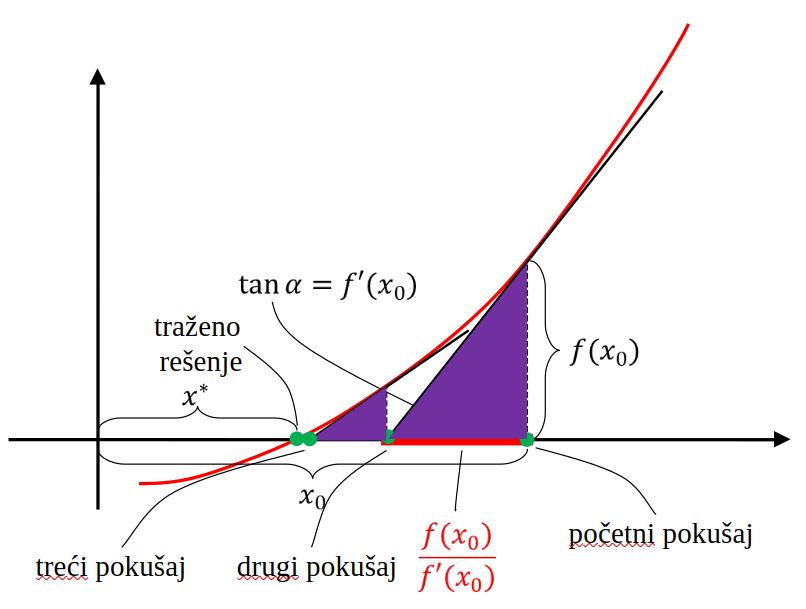

### Rješenje je određeno dovoljno precizno za $|x_n-x_{n-1}|<\varepsilon$, ili drukčije zapisano kao $\big|\frac{f(x_{n-1})}{f'(x_{n-1})}\big|<\varepsilon$.
### Drugim riječima, dovoljni uslovi konvergencije su:
### a) $f(a)\cdot f(b)<0$;
### b) $f'(x)\neq0$;
### c) $f''(x)$ ne mijenja znak na $(a,b)$.

### Ponovo radimo sa funkcijom $f(x)=\log{x}-\cos{x}+x^{3/4}-x$.

vrijeme izračunavanja: 0.00515 s
broj iteracija: 4
rješenje jednacine: 4.740672


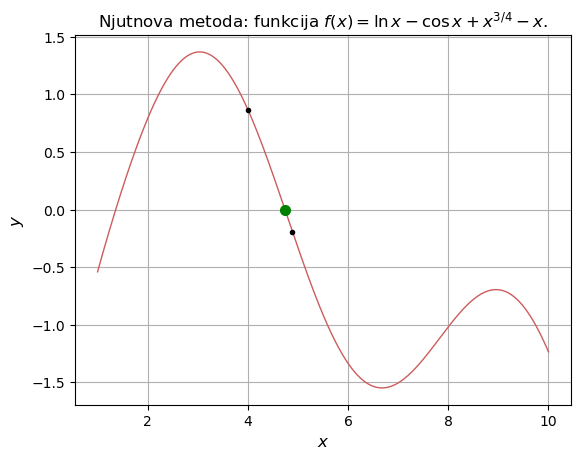

In [9]:
# Definišemo funkciju i prvi izvod naše funkcije

def func(x1):
    return np.log(x1) - np.cos(x1) + x1 ** (3/4) - x1

def funcprim(x1):
    return 1/x1 + np.sin(x1) + 3/4 * x1 ** (-1/4) - 1

# x = np.arange(1, 2, 1e-3)

x = np.linspace(1, 10, 1000)
f = np.log(x) - np.cos(x) + x ** (3/4) - x

plt.plot(x, f, color='indianred', linewidth=1)
plt.title(r'Njutnova metoda: funkcija $f(x)=\ln{x}-\cos{x}+x^{3/4}-x$.')
plt.xlabel(r'$x$', fontsize=12, fontweight='bold')
plt.ylabel(r'$y$', fontsize=12, fontweight='bold')
plt.grid()

x1 = 4
tacnost = 1e-8
epsilon = 2 * tacnost
broj_iteracija = 0
pocetak = time.time()

while abs(epsilon) > tacnost:
    
    broj_iteracija += 1
    f = func(x1)
    fprim = funcprim(x1)
    epsilon = f/fprim
    plt.plot(x1, f, 'o', color='black', markersize=3)
    x1 = x1 - epsilon
    
vrijeme_njutn = time.time() - pocetak
iteracije_njutn = broj_iteracija 

print('vrijeme izračunavanja:', np.round((vrijeme_njutn), 5), 's')
print('broj iteracija: {}'.format(iteracije_njutn))
print('rješenje jednacine:', np.round((x1), 6))

plt.plot(x1, f, 'o', color='green', markersize=7)
plt.show()

### $\color{magenta}{\text{4. UPOREĐIVANJE METODA: Tetive vs Njutn}} $

In [15]:
print('Odnos vremena izračunavanja: Metoda tetive / Njutnova metoda =', vrijeme_tetive/vrijeme_njutn)
print('Broj iteracija za metodu tetiva je:', iteracije_tetive)
print('Broj iteracija za Njutnovu metodu je:', iteracije_njutn)

Odnos vremena izračunavanja: Metoda tetive / Njutnova metoda = 1.4533506108848575
Broj iteracija za metodu tetiva je: 6
Broj iteracija za Njutnovu metodu je: 4


### $\color{magenta}{\text{5. PRIMJENA: Plankov zakon.}} $

### Plankov zakon predstavlja opis raspodjele elektromagnetnog zračenja koje emituje crno
### tijelo u zavisnosti od talasne dužine i temperature, a dat je u obliku: $I(\lambda, T) = \frac{2hc²}{\lambda⁵}\frac{1}{e^{\frac{hc}{\lambda kT}}-1}$.
### Naš zadatak je da odredimo talasnu dužinu na kojoj Sunce zrači $10\frac{kW}{m²nm}$.


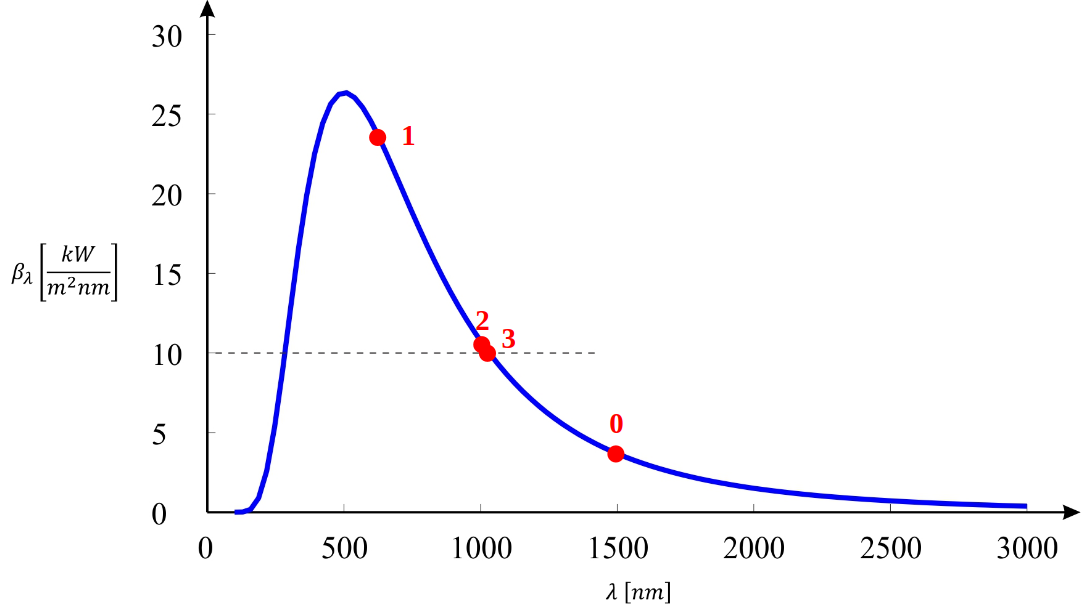

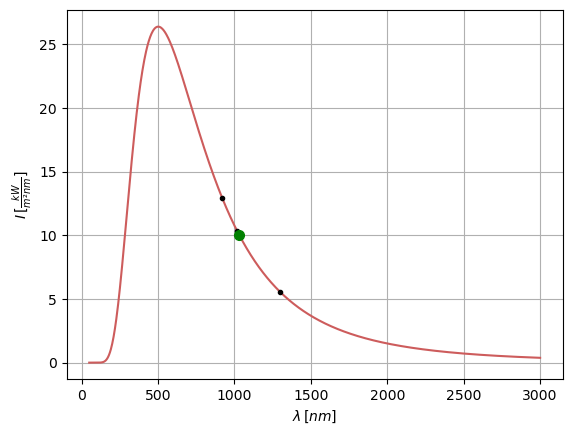

Tražena talasna dužina je: 1032.37825038803 nm
Broj iteracija je: 5


In [16]:
# Konstante koje figurišu u jednačini

c = 299792458.  # brzina svjetlosti [m/s]
h = 6.62607004e-34  # Plankova konstanta [Js]
e = np.exp(1) 
k = 1.38064852e-23  # Bolcmanova konstanta [J/K]
t = 5778.0  # temperatura Sunca [K]


l = sym.Symbol('l') # talasna dužina (simbolička promjenjiva)
f = 2 * h * c ** 2/l ** 5/(sym.exp(h * c/(l * k * t)) - 1) # Plankov zakon
f1 = sym.diff(f, l) # Izvod po simboličkoj promjenjivoj

l_num = np.linspace(50e-9, 3000e-9, 1000) # numeričke vrijednosti [m]
f_num = np.zeros_like(l_num)

# Računanje Plankovog zakona za svaku talasnu dužinu

for p in range(0, len(l_num)):
    f_num[p] = f.subs(l, l_num[p])  # simbolički izraz -> numerički izraz

plt.plot(1e9 * l_num, f_num * 1e-12, color='indianred')  # konverzija jedinica u nm i kW/m²/nm
plt.ylabel(r'$I\,[\frac{kW}{m²nm}]$')
plt.xlabel(r'$\lambda\,[nm]$')
plt.grid()

###########################################################################################################

# Njutnova metoda

tacnost = 1e-12 
epsilon = 2 * tacnost
l_trazeno = 1300e-9  # inicijalna talasna dužina [m]
f_trazeno = 10e12  # tražena vrijednost u W/m²/m (osnovne jedinice)

broj_iteracija = 0
while np.abs(epsilon) > tacnost:
    broj_iteracija += 1
    
    ff = f.subs(l, l_trazeno) - f_trazeno
    fprim = f1.subs(l, l_trazeno)
    epsilon = ff / fprim
    
    # Prikaz svake iteracije
    
    plt.plot(1e9 * l_trazeno, (ff + f_trazeno) * 1e-12, 'o', color='black', markersize=3) 
    l_trazeno = l_trazeno - epsilon  # ažuriranje promjenjive

# Završno plotovanje konačne tačke

plt.plot(1e9 * l_trazeno, (ff + f_trazeno) * 1e-12, 'o', color='green', markersize=7)
plt.show()

print('Tražena talasna dužina je:', l_trazeno * 1e9, 'nm')
print('Broj iteracija je:', broj_iteracija)

### $\color{magenta}{\text{6. PRIMJENA: Maksvelova raspodjela po brzinama.}} $
### Maksvelova raspodjela predstavlja se formulom: $p(v)=4\pi v²\big(\frac{m}{2\pi k T}\big)^{3/2}e^{\frac{-mv²}{2kT}}$. 
### Naš zadatak:  molekuli kiseonika se kreću na apsolutnoj temperaturi od $250\,K$.
### Treba odrediti koja brzina molekula ima vjerovatnoću od $0.0015$.

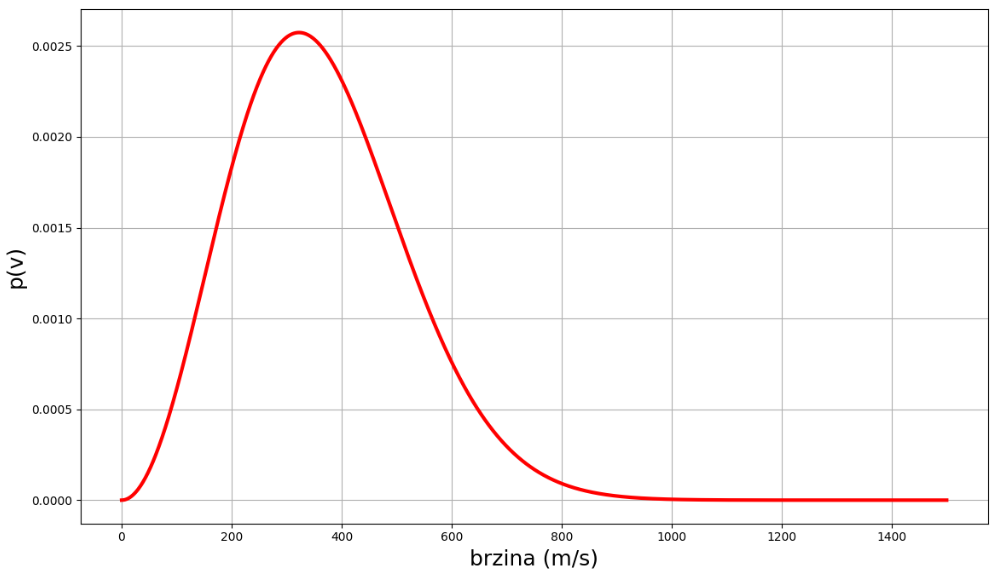

Tražena brzina je: 538.555343652303 m/s
Broj iteracija je: 3


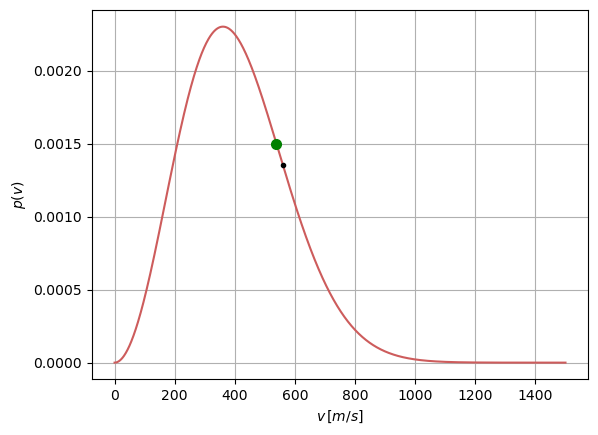

In [19]:
# Konstante koje figurišu u jednačini

c = 299792458. # već definisane veličine
h = 6.62607004e-34
e = np.exp(1)

t = 250. # apsolutna temperatura [K]
m = 5.31e-26 # masa molekula kiseonika [kg]
k = 1.38064852e-23 # Bolcmanova konstanta [J/K]

v_trazeno = 560 # inicijalni pokušaj
p_trazeno = 0.0015 # tražena vrijednost u osnovnim jedinicama

v = sym.Symbol('v') # brzina (simbolička promjenjiva)
p = 4 * np.pi * v ** 2 * (m /2/np.pi/k/t) ** (3/2) * sym.exp(-m * v ** 2/2/k/t) # Maksvelova r.
p1 = sym.diff(p,v) # Izvod po simboličkoj promjenjivoj

v_num = np.linspace(0, 1500, 1000) # numeričke vrijednosti
p_num = np.zeros_like(v_num)

for k in range(0,len(v_num)):

    p_num[k] = p.subs(v,v_num[k]) # simbolički izraz -> numerički izraz
    
plt.plot(v_num,p_num, color = 'indianred') # konverzija jedinica u nm i kW/m**2/nm
plt.xlabel(r'$v\,[m/s]$')
plt.ylabel(r'$p(v)$')
plt.grid()

###########################################################################################################

# Njutnova metoda

tacnost = 1e-4
delta = 2 * tacnost
broj_iteracija = 0

while np.abs(delta) > tacnost:
    broj_iteracija += 1

    pp = p.subs(v,v_trazeno)-p_trazeno
    pprim = p1.subs(v,v_trazeno)
    delta = pp / pprim
    plt.plot(v_trazeno,(pp + p_trazeno), 'o', color='black', markersize=3)
    v_trazeno = v_trazeno - delta
    
plt.plot(v_trazeno,(pp + p_trazeno), 'o', color='green', markersize=7)

print('Tražena brzina je:', v_trazeno, 'm/s')
print('Broj iteracija je:', broj_iteracija)

### $\color{green}{\text{ZADACI:}} $

#### 1. Napisati funkciju koja vraća proizvod prvih $n$ članova geometrijskog niza. Prvi član niza je $a_1$, a količnik je $q$.
____
#### 2.  Napisati funkciju koja provjerava da li je dati niz rastući. Funkcija treba da vrati $\textit{True}$ ako je niz rastući, 
#### a $\textit{False}$ ako to niz nije. Uzeti random niz brojeva.
----
#### 3. Napisati funkciju koja vraća prvih $n$ članova Fibonačijevog niza. Pomoć: $f_0=0$, $f_1=1$, $f_n=f_{n-1}+f_{n-2}$, $n\geq2$.
----
#### 4. Izračunati poluprečnik Švarcšildove crne rupe $R_S$, poznat i kao Švarcšildov radijus, za zvijezdu sa masom $M=5\cdot10^{30}\,kg$. 
#### Koristiti Njutnov metod za nalaženje rješenja jednačine: $f(R_S)=\frac{2GM}{R_S}-c²=0$, gdje su:
#### $G=6.67430\cdot10^{-11} \,m^3 kg^{−1} s^{−2}$ - gravitaciona konstanta, $c=299792458 m/s$ - brzina svjetlosti.
#### Plotovati odgovarajuću funkciju i rješenja.
----
#### 5. Pronaći ravnotežnu temperaturu planete $T_P$ koja kruži oko zvijezde slične Suncu na udaljenosti $d$, koristeći 
#### pretpostavku da je planeta u radijativnoj ravnoteži (sva apsorbovana energija je jednaka zračenju planete). 
#### Planeta reflektuje dio svjetlosti koju dobija od zvijezde, pa je apsorbovana energija proporcionalna faktoru apsorpcije 
#### $(1−A)$, gdje je $A$ albedo planete. Zvijezda zrači kao crno tijelo temperature $T_S$, sa luminoznošću $L_S$.
#### Jednačina koja opisuje ravnotežnu temperaturu planete je: $\frac{L_S}{4\pi d²}(1-A)=\sigma T_P⁴$, gdje su:
#### $L_S=3.828\cdot10^{26}\,W$ - luminoznost zvijezde, $d=1.496\cdot10^{11}\,m$ - rastojanje od zvijezde do planete 
#### (udaljenost Zemlje od Sunca), $A=0.3$ - albedo planete (slična vrijednost za Zemlju), $σ=5.67\cdot10{−8}\,W m^{−2}K^{−4}$ je
####  Štefan - Bolcmanova konstanta. Zadatak treba uraditi Njutnovom metodom, te plotovati pripadajuće grafike.


### $\color{green}{\text{RJEŠENJA:}} $